In [10]:
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd 
from sklearn import preprocessing, metrics 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score 
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [11]:
df=pd.read_csv('ColumnsABCD.csv')
x=df.drop('Label',axis=1)
y=df.Label
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=4)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scale = MinMaxScaler()
X_tr = scale.fit_transform(X_train)
X_te = scale.transform(X_test)

In [12]:
#instantiating ML models
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu'
                    ,solver='adam',random_state=23)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=1000)

#training models
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mnb.fit(X_tr, y_train)
dtc.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

#predictions
a = mlp.predict(X_test)
b = svm.predict(X_test)
c = gnb.predict(X_test)
d = mnb.predict(X_test)
e = dtc.predict(X_test)
f = lr.predict(X_test)
g = rf.predict(X_test)
h = knn.predict(X_test)

#Metrics for mlp

print("Metrics for MLP")
print("accuracy", accuracy_score(y_test,a))

print( classification_report(y_test,a))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(mlp, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

      
print("Metrics for SVM")
print("accuracy", accuracy_score(y_test,b))

print(classification_report(y_test,b))
      
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(svm, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

    




Metrics for MLP
accuracy 0.8284671532846716
              precision    recall  f1-score   support

         1.0       0.85      0.92      0.88        65
         2.0       0.92      0.85      0.88        72
         3.0       0.81      0.75      0.78        73
         4.0       0.74      0.80      0.77        64

    accuracy                           0.83       274
   macro avg       0.83      0.83      0.83       274
weighted avg       0.83      0.83      0.83       274

Cross Validation accuracy scores: [0.703125   0.796875   0.796875   0.859375   0.84375    0.796875
 0.828125   0.84375    0.79365079 0.88888889]
Cross Validation accuracy: 0.815 +/- 0.048
Metrics for SVM
accuracy 0.7992700729927007
              precision    recall  f1-score   support

         1.0       0.77      0.89      0.83        65
         2.0       0.89      0.76      0.82        72
         3.0       0.80      0.77      0.78        73
         4.0       0.75      0.78      0.76        64

    accuracy     

In [13]:
print("Metrics for GNB")
print("accuracy", accuracy_score(y_test,c))

print(classification_report(y_test,c))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(gnb, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for GNB
accuracy 0.6788321167883211
              precision    recall  f1-score   support

         1.0       0.70      0.94      0.80        65
         2.0       0.92      0.64      0.75        72
         3.0       0.80      0.27      0.41        73
         4.0       0.53      0.92      0.67        64

    accuracy                           0.68       274
   macro avg       0.74      0.69      0.66       274
weighted avg       0.74      0.68      0.65       274

Cross Validation accuracy scores: [0.625      0.625      0.703125   0.703125   0.671875   0.734375
 0.6875     0.75       0.68253968 0.73015873]
Cross Validation accuracy: 0.691 +/- 0.040


In [14]:
print("Metrics for MNB")
print("accuracy", accuracy_score(y_test,d))

print(classification_report(y_test,d))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(mnb, X=X_tr, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for MNB
accuracy 0.6678832116788321
              precision    recall  f1-score   support

         1.0       0.73      0.85      0.79        65
         2.0       0.81      0.72      0.76        72
         3.0       0.80      0.22      0.34        73
         4.0       0.52      0.94      0.67        64

    accuracy                           0.67       274
   macro avg       0.72      0.68      0.64       274
weighted avg       0.72      0.67      0.64       274

Cross Validation accuracy scores: [0.59375    0.671875   0.734375   0.65625    0.734375   0.734375
 0.703125   0.71875    0.71428571 0.71428571]
Cross Validation accuracy: 0.698 +/- 0.043


In [15]:
print("Metrics for DecisionTree")
print("accuracy", accuracy_score(y_test,e))

print(classification_report(y_test,e))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(dtc, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for DecisionTree
accuracy 0.7956204379562044
              precision    recall  f1-score   support

         1.0       0.78      0.86      0.82        65
         2.0       0.86      0.78      0.82        72
         3.0       0.80      0.77      0.78        73
         4.0       0.75      0.78      0.76        64

    accuracy                           0.80       274
   macro avg       0.80      0.80      0.80       274
weighted avg       0.80      0.80      0.80       274

Cross Validation accuracy scores: [0.6875     0.640625   0.734375   0.6875     0.796875   0.78125
 0.765625   0.734375   0.61904762 0.77777778]
Cross Validation accuracy: 0.722 +/- 0.058


In [16]:
print("Metrics for Logistic Regression")
print("accuracy", accuracy_score(y_test,f))

print(classification_report(y_test,f))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(lr, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for Logistic Regression
accuracy 0.8138686131386861
              precision    recall  f1-score   support

         1.0       0.77      0.89      0.83        65
         2.0       0.89      0.76      0.82        72
         3.0       0.84      0.78      0.81        73
         4.0       0.77      0.83      0.80        64

    accuracy                           0.81       274
   macro avg       0.82      0.82      0.81       274
weighted avg       0.82      0.81      0.81       274

Cross Validation accuracy scores: [0.734375   0.75       0.859375   0.875      0.828125   0.78125
 0.734375   0.828125   0.66666667 0.87301587]
Cross Validation accuracy: 0.793 +/- 0.067


In [17]:
print("Metrics for Random Forest")
print("accuracy", accuracy_score(y_test,g))

print(classification_report(y_test,g))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for Random Forest
accuracy 0.8284671532846716
              precision    recall  f1-score   support

         1.0       0.80      0.94      0.87        65
         2.0       0.93      0.79      0.86        72
         3.0       0.88      0.71      0.79        73
         4.0       0.73      0.89      0.80        64

    accuracy                           0.83       274
   macro avg       0.84      0.83      0.83       274
weighted avg       0.84      0.83      0.83       274

Cross Validation accuracy scores: [0.6875     0.765625   0.875      0.859375   0.828125   0.828125
 0.796875   0.875      0.66666667 0.87301587]
Cross Validation accuracy: 0.806 +/- 0.073


In [18]:
print("Metrics for KNN")
print("accuracy", accuracy_score(y_test,h))

print(classification_report(y_test,h))

# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for KNN
accuracy 0.8138686131386861
              precision    recall  f1-score   support

         1.0       0.83      0.92      0.88        65
         2.0       0.90      0.85      0.87        72
         3.0       0.80      0.71      0.75        73
         4.0       0.72      0.78      0.75        64

    accuracy                           0.81       274
   macro avg       0.81      0.82      0.81       274
weighted avg       0.82      0.81      0.81       274

Cross Validation accuracy scores: [0.609375   0.796875   0.734375   0.828125   0.796875   0.65625
 0.828125   0.71875    0.68253968 0.79365079]
Cross Validation accuracy: 0.744 +/- 0.072


In [19]:
m1=confusion_matrix(y_test,a)
m1

array([[60,  5,  0,  0],
       [11, 61,  0,  0],
       [ 0,  0, 55, 18],
       [ 0,  0, 13, 51]], dtype=int64)

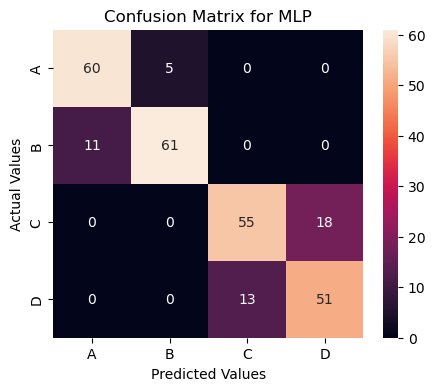

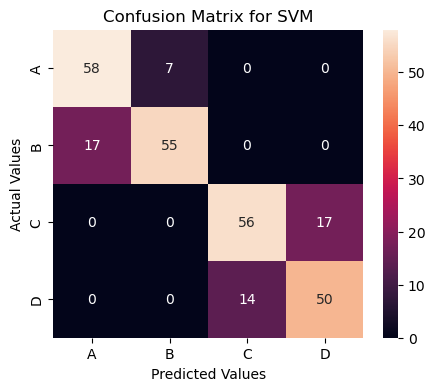

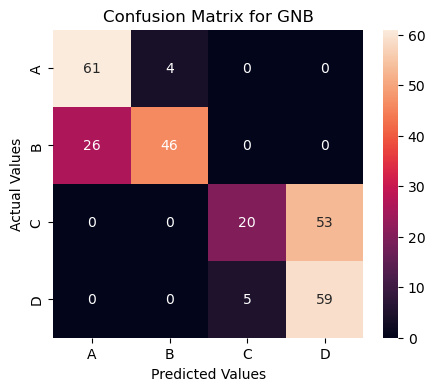

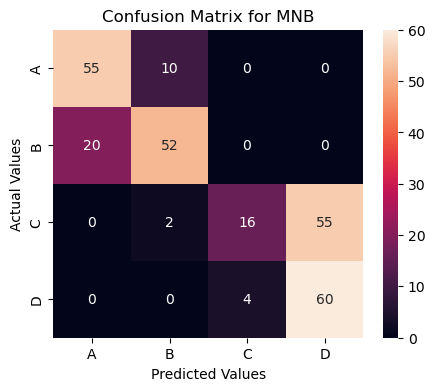

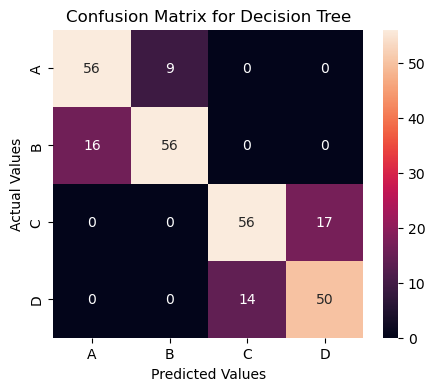

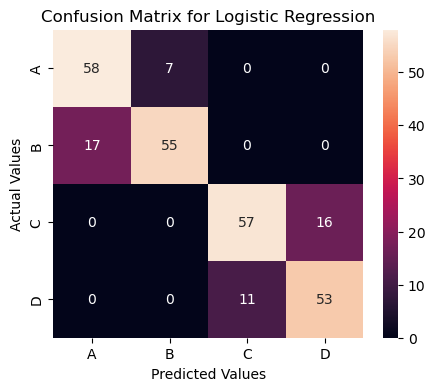

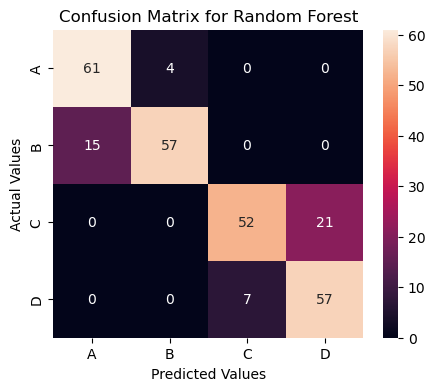

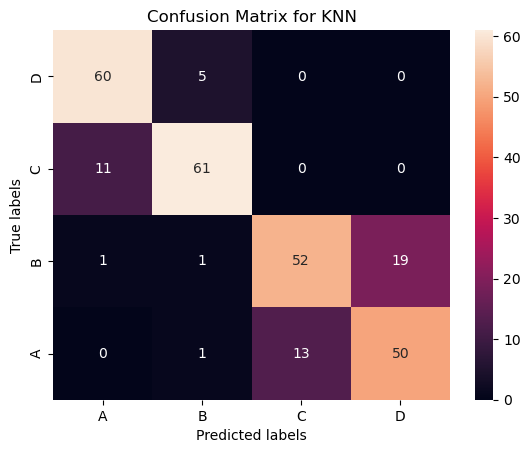

In [31]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


m1 = cm(y_test,a)
m2 = cm(y_test,b)
m3 = cm(y_test,c)
m4 = cm(y_test,d)
m5 = cm(y_test,e)
m6 = cm(y_test,f)
m7 = cm(y_test,g)
m8 = cm(y_test,h)


m1= pd.DataFrame(m1,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m1, annot=True)
plt.title('Confusion Matrix for MLP')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


m2= pd.DataFrame(m2,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m2, annot=True)
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


m3= pd.DataFrame(m3,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m3, annot=True)
plt.title('Confusion Matrix for GNB')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

m4=pd.DataFrame(m4,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m4, annot=True)
plt.title('Confusion Matrix for MNB')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

m5= pd.DataFrame(m5,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m5, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

m6= pd.DataFrame(m6,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m6, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

m7= pd.DataFrame(m7,
                     index = ['A','B','C','D'], 
                     columns = ['A','B','C','D'])
plt.figure(figsize=(5,4))
sns.heatmap(m7, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

ax= plt.subplot()
sns.heatmap(m8, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN'); 
ax.xaxis.set_ticklabels(['A', 'B', 'C', 'D']); ax.yaxis.set_ticklabels(['D', 'C', 'B', 'A']);